# 0. Install and Import Dependencies

In [3]:
!pip install mediapipe opencv-python pandas scikit-learn

In [3]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [5]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

# 1. Make Some Detections

In [19]:
import cv2
import mediapipe as mp

# Initialize drawing utilities and holistic model
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks (using FACEMESH_CONTOURS)
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand landmarks
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand landmarks
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        # Display the resulting frame
        cv2.imshow('Raw Webcam Feed', image)

        # Exit the loop when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [21]:
results.face_landmarks.landmark[0].visibility

0.0

# 2. Capture Landmarks & Export to CSV
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

In [7]:
import csv
import os
import numpy as np

In [94]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [96]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [98]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [102]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [131]:
class_name = "SURPRISED"

In [133]:
import cv2
import csv
import numpy as np
import mediapipe as mp

# Initialize MediaPipe holistic model and drawing utils
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

# Video capture from webcam
cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks using FACEMESH_CONTOURS
        if results.face_landmarks:
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                      mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                      mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                     )
        
        # 2. Right hand landmarks
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                      mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                     )

        # 3. Left Hand landmarks
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                      mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                     )

        # 4. Pose landmarks
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                      mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                      mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )
        
        # Export coordinates to CSV
        try:
            # Extract Pose landmarks
            if results.pose_landmarks:
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            else:
                pose_row = []

            # Extract Face landmarks
            if results.face_landmarks:
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            else:
                face_row = []
            
            # Concatenate rows (pose and face)
            row = pose_row + face_row
            
            # Insert a class name (if necessary, modify class_name)
            class_name = "SURPRISED"  # Replace with your class name if needed
            row.insert(0, class_name)
            
            # Write to CSV file
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
        
        except Exception as e:
            print(f"Error exporting landmarks: {e}")
                        
        # Display the frame
        cv2.imshow('Raw Webcam Feed', image)

        # Exit on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


C:\Users\86000\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('coords part 3.csv')

In [27]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Happy,0.539568,0.451509,-0.838285,0.999980,0.568732,0.379725,-0.775669,0.999958,0.586728,...,-0.000007,0.0,0.602125,0.391889,0.022773,0.0,0.607967,0.385795,0.023939,0.0
1,Happy,0.546984,0.444970,-1.218682,0.999980,0.576061,0.375831,-1.132845,0.999958,0.595439,...,-0.000776,0.0,0.629383,0.384543,0.022572,0.0,0.635486,0.378225,0.023750,0.0
2,Happy,0.514887,0.492867,-1.188112,0.999964,0.543754,0.420162,-1.100590,0.999940,0.564322,...,-0.000644,0.0,0.564326,0.460960,0.022354,0.0,0.569627,0.453964,0.023628,0.0
3,Happy,0.506415,0.495714,-1.279116,0.999951,0.534640,0.423166,-1.188707,0.999923,0.556193,...,-0.000193,0.0,0.562461,0.452442,0.023320,0.0,0.568330,0.445110,0.024677,0.0
4,Happy,0.503717,0.494873,-1.300222,0.999944,0.532287,0.422559,-1.206028,0.999913,0.554169,...,-0.000283,0.0,0.562962,0.450650,0.024507,0.0,0.568513,0.443560,0.025924,0.0


In [29]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
1138,suprised,0.666996,0.578490,-1.256463,0.997320,0.681457,0.497618,-1.151609,0.996828,0.696068,...,0.005243,0.0,0.694329,0.510265,0.039888,0.0,0.700155,0.500110,0.042383,0.0
1139,suprised,0.606218,0.577807,-1.250377,0.997566,0.642210,0.497468,-1.143151,0.997109,0.661961,...,0.000568,0.0,0.664616,0.505179,0.024976,0.0,0.671669,0.494495,0.026641,0.0
1140,suprised,0.541530,0.575263,-1.242186,0.997774,0.580980,0.495348,-1.150071,0.997345,0.607163,...,-0.003334,0.0,0.621815,0.494679,0.008596,0.0,0.629576,0.483590,0.009108,0.0
1141,suprised,0.526928,0.571294,-1.222579,0.997944,0.566281,0.492664,-1.146580,0.997537,0.592687,...,-0.004936,0.0,0.618172,0.496338,0.004848,0.0,0.625661,0.484573,0.005339,0.0
1142,suprised,0.504611,0.570257,-1.110417,0.998053,0.543543,0.490620,-1.063877,0.997630,0.568412,...,-0.004425,0.0,0.588169,0.492638,-0.001971,0.0,0.596220,0.480309,-0.002251,0.0


In [31]:
df[df['class']=='Yes']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501


In [33]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [37]:
y_test

221          Sad
308          yes
680           no
920     suprised
624           no
          ...   
503          yes
51         Happy
1112    suprised
556          yes
352          yes
Name: class, Length: 343, dtype: object

## 3.2 Train Machine Learning Classification Model

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define pipelines with SimpleImputer to handle missing values
pipelines = {
    'lr': make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), RidgeClassifier()),
    'rf': make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), GradientBoostingClassifier()),
}

# Fit the models
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model


In [43]:
fit_models

{'lr': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [45]:
fit_models['rc'].predict(X_test)

array(['Sad', 'yes', 'no', 'suprised', 'no', 'yes', 'Sad', 'no',
       'suprised', 'no', 'no', 'suprised', 'no', 'suprised', 'no',
       'Happy', 'suprised', 'suprised', 'no', 'no', 'no', 'yes', 'Happy',
       'yes', 'yes', 'Happy', 'suprised', 'Happy', 'no', 'no', 'suprised',
       'no', 'no', 'suprised', 'no', 'yes', 'yes', 'suprised', 'Happy',
       'suprised', 'suprised', 'yes', 'Sad', 'no', 'yes', 'yes', 'yes',
       'Happy', 'yes', 'no', 'suprised', 'yes', 'Happy', 'suprised',
       'yes', 'no', 'yes', 'yes', 'Sad', 'Sad', 'no', 'suprised', 'Happy',
       'suprised', 'suprised', 'no', 'no', 'yes', 'no', 'yes', 'Sad',
       'yes', 'Sad', 'Sad', 'suprised', 'yes', 'yes', 'Sad', 'suprised',
       'Happy', 'suprised', 'Sad', 'suprised', 'Happy', 'suprised', 'yes',
       'suprised', 'suprised', 'Happy', 'no', 'no', 'yes', 'Sad', 'no',
       'Sad', 'suprised', 'no', 'yes', 'Sad', 'yes', 'yes', 'Sad', 'no',
       'yes', 'no', 'suprised', 'Sad', 'yes', 'suprised', 'Happy',
 

## 3.3 Evaluate and Serialize Model 

In [48]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [50]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9970845481049563
rc 0.9970845481049563
rf 0.9970845481049563
gb 0.9970845481049563


In [52]:
  print(f"Model {algo} fitted: \n{model}\n")

Model gb fitted: 
Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])



<Figure size 600x600 with 0 Axes>

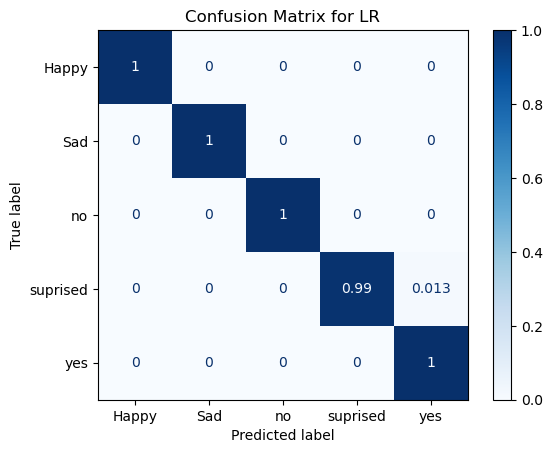

<Figure size 600x600 with 0 Axes>

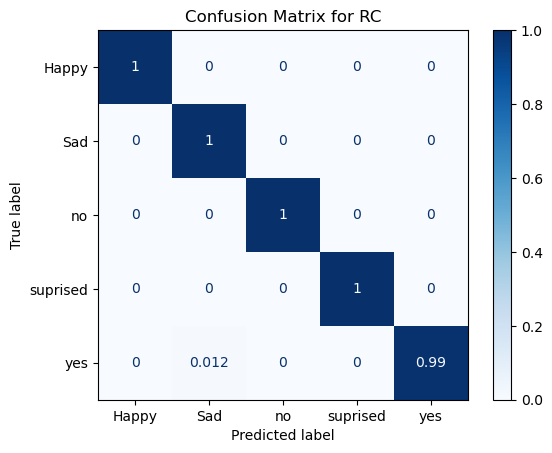

<Figure size 600x600 with 0 Axes>

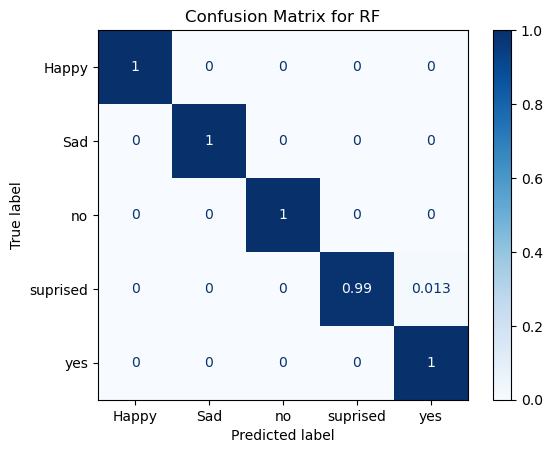

<Figure size 600x600 with 0 Axes>

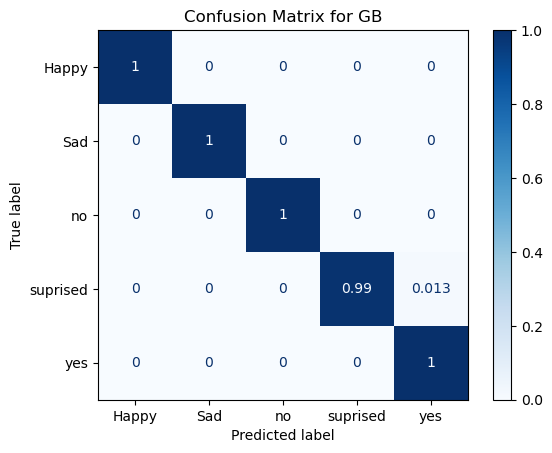

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for each model
for algo, model in fit_models.items():
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', normalize='true')
    disp.ax_.set_title(f'Confusion Matrix for {algo.upper()}')
    plt.show()

Skipping class 0 for LR as there are no positive samples in y_test.
Skipping class 1 for LR as there are no positive samples in y_test.
Skipping class 2 for LR as there are no positive samples in y_test.
Skipping class 0 for RF as there are no positive samples in y_test.
Skipping class 1 for RF as there are no positive samples in y_test.
Skipping class 2 for RF as there are no positive samples in y_test.
Skipping class 0 for GB as there are no positive samples in y_test.
Skipping class 1 for GB as there are no positive samples in y_test.
Skipping class 2 for GB as there are no positive samples in y_test.


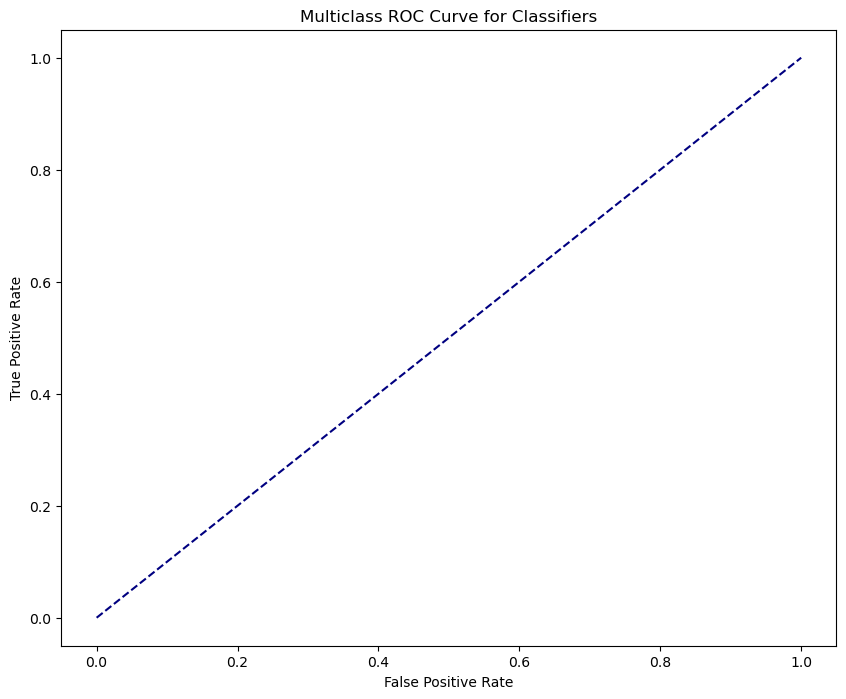

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multiclass classification
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels based on your dataset

plt.figure(figsize=(10, 8))

# Track if we have added any plots
plots_added = False

for algo, model in fit_models.items():
    if hasattr(model, 'predict_proba'):  # Skip models without predict_proba
        y_score = model.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        for i in range(y_test_binarized.shape[1]):
            if np.sum(y_test_binarized[:, i]) == 0:
                print(f"Skipping class {i} for {algo.upper()} as there are no positive samples in y_test.")
                continue  # Skip classes without positive samples

            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{algo.upper()} - Class {i} (AUC = {roc_auc:.2f})')
            plots_added = True  # Mark that a plot has been added

# Plotting the baseline
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Only show the legend if any plots were added
if plots_added:
    plt.legend(loc='lower right')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Classifiers')
plt.show()

In [58]:
fit_models['rf'].predict(X_test)

array(['Sad', 'yes', 'no', 'suprised', 'no', 'yes', 'Sad', 'no',
       'suprised', 'no', 'no', 'suprised', 'no', 'suprised', 'no',
       'Happy', 'suprised', 'suprised', 'no', 'no', 'no', 'yes', 'Happy',
       'yes', 'yes', 'Happy', 'suprised', 'Happy', 'no', 'no', 'suprised',
       'no', 'no', 'suprised', 'no', 'yes', 'yes', 'suprised', 'Happy',
       'suprised', 'suprised', 'yes', 'Sad', 'no', 'yes', 'yes', 'yes',
       'Happy', 'yes', 'no', 'suprised', 'yes', 'Happy', 'suprised',
       'yes', 'no', 'yes', 'yes', 'Sad', 'Sad', 'no', 'suprised', 'Happy',
       'suprised', 'suprised', 'no', 'no', 'yes', 'no', 'yes', 'Sad',
       'yes', 'Sad', 'Sad', 'suprised', 'yes', 'yes', 'Sad', 'yes',
       'Happy', 'suprised', 'Sad', 'suprised', 'Happy', 'suprised', 'yes',
       'suprised', 'suprised', 'Happy', 'no', 'no', 'yes', 'Sad', 'no',
       'Sad', 'suprised', 'no', 'yes', 'Sad', 'yes', 'yes', 'Sad', 'no',
       'yes', 'no', 'suprised', 'Sad', 'yes', 'suprised', 'Happy',
      

In [60]:
y_test

221          Sad
308          yes
680           no
920     suprised
624           no
          ...   
503          yes
51         Happy
1112    suprised
556          yes
352          yes
Name: class, Length: 343, dtype: object

In [67]:
with open('body_language2.pkl', 'wb') as f:
    pickle.dump(fit_models['rc'], f)

# 4. Make Detections with Model

In [76]:
with open('body_language2.pkl', 'rb') as f:
    model = pickle.load(f)

In [78]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('ridgeclassifier', RidgeClassifier())])

In [82]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = joblib.load('body_language.pkl')  # Replace with your actual model path

# Start capturing webcam video feed
cap = cv2.VideoCapture(0)

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor feed to RGB for MediaPipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Save processing time by marking image as not writeable

        # Make detections
        results = holistic.process(image)

        # Recolor image back to BGR for OpenCV
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSALATION, 
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
        # Extract coordinates for prediction
        try:
            # Extract Pose landmarks
            pose_landmarks = results.pose_landmarks.landmark
            pose_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks]).flatten()

            # Extract Face landmarks
            face_landmarks = results.face_landmarks.landmark
            face_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face_landmarks]).flatten()

            # Concatenate both pose and face landmarks
            row = np.concatenate([pose_row, face_row])

            # Convert to DataFrame for model prediction
            X = pd.DataFrame([row])

            # Make predictions
            body_language_class = model.predict(X)[0]

            # Grab coordinates for displaying text on the frame (using left ear)
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640, 480]).astype(int))

            # Draw rectangle for class display
            cv2.rectangle(image, (coords[0], coords[1] + 5), 
                          (coords[0] + len(body_language_class) * 20, coords[1] - 30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Display status box
            cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)

            # Display Class
            cv2.putText(image, 'HAPPY', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class, (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        except Exception as e:
            print(f"Error: {e}")
            pass

        # Show the image with detections
        cv2.imshow('Raw Webcam Feed', image)

        # Break loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

C:\Users\86000\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


AttributeError: module 'mediapipe.python.solutions.holistic' has no attribute 'FACEMESH_TESSALATION'

In [179]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(422, 189)